## Case study 3.  Spam or Ham
More than 8500 email messages has been provided. These email messages have spam or ham labels.  
And the primary objective is to build a classification model that can predict an unknown email as spam or no spam.  

In [1]:
import os
import email
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

### Email Parser.  
- Here we build an email parser that will take a folder path. 
- it will check the mailtype and then append the content to an initialized list.  
- If the email contains hyper link and html tags, we will use BeautifulSoup library to filter those out.
- Python library 'email' will be used to parse the emails and its .getpayload() method will be used to extract the main body of the email messages.  



In [2]:
import codecs
types_of_encoding = ["utf8", "cp1252"]
counter=0


def email_prep(folder_path=" "):
    targets = []
    data = []
    count = 0
    #not_spamList = os.listdir("./easy_ham/")
    #spamList = os.listdir("./spam/")  
    

    for i in os.listdir(folder_path):
        file = os.path.join(folder_path, i)
        
        for encoding_type in types_of_encoding:
            with open(file, encoding = encoding_type, errors ='replace') as f:
                x = email.message_from_file(f)
        mailType = x.get_content_type()
        if mailType == "text/plain":
            #data.append(nlp(x.get_payload()).vector)
            data.append(x.get_payload())
            targets.append(0)
        elif mailType == "text/html":
            tmp = BeautifulSoup(x.get_payload(), 'html.parser')
            tmp = tmp.text.replace("\n"," ")
            #tmp = nlp(tmp)
            data.append(tmp)
            targets.append(0)
#         elif mailType == "multipart/alternative": #This loop did not work for me.
#             for x_ in x:
#                 data.append(x_.get_payload())
#                 targets.append(0)
        else:
            print(f"msg {i} not parsed")
            print(x.get_content_type())
#         if count % 100 == 0:
#             print(count)
        count = count + 1
#         if count == 1000:
#             break
    return targets, data, count

In [3]:
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Quantifying the world'

## 1 Parse the Spam messages and store them in a list

In [4]:
import re
root = "../Quantifying the world/SpamAssassinMessages"
targets_spam_all, data_spam_all, count_spam_all = [], [], []
for folder in os.listdir(root):
    if re.match(r'spam', folder):
        spam_folder = os.path.join(root, folder)
        targets_spam, data_spam, count_spam = email_prep(spam_folder)
        targets_spam_all.append(targets_spam)
        data_spam_all.append(data_spam)
        count_spam_all.append(count_spam)

msg 00022.8203cdf03888f656dc0381701148f73d not parsed
multipart/mixed
msg 00023.b6d27c684f5fc803cfa1060adb2d0805 not parsed
multipart/mixed
msg 00024.6b5437b14d403176c3f046c871b5b52f not parsed
multipart/alternative
msg 00038.8d93819b95ff90bf2e2b141c2909bfc9 not parsed
multipart/alternative
msg 00039.889d785885f092c269741b11f2124dce not parsed
multipart/mixed
msg 00074.51aab41b27a9ba7736803318a2e4c8de not parsed
multipart/mixed
msg 00078.6944f51ce9c0586d8f9137d2d2207df0 not parsed
multipart/mixed
msg 00080.5a7386cb47846dfef68429241ad80354 not parsed
multipart/alternative
msg 00082.0341a767bbaca01fd89b6236ef681257 not parsed
multipart/mixed
msg 00087.f09438ca6392721e63696f4f753effbb not parsed
multipart/mixed
msg 00090.52630c4c07cd069c7bc7658c1a7a7253 not parsed
multipart/alternative
msg 00092.8ca54ce0c31e6149b5ef05c0108743be not parsed
multipart/mixed
msg 00095.17594a58d6736a8f6a1990b0b92090cd not parsed
multipart/mixed
msg 00096.a791864be5f1205bf2cea0adf241b25a not parsed
multipart/al

msg 0158.ff5dce5446d2ec91f0caffeffdd48852 not parsed
multipart/alternative
msg 0189.3d89383221aa3fb155a099838ce9c40a not parsed
multipart/mixed
msg 0195.8b276e08dd05b0131faa8fb24764f205 not parsed
multipart/alternative
msg 0196.16da0dc3452b7407d4f89a0b2efcff0c not parsed
multipart/mixed
msg 0200.a56926c058fa84b0ea031b5774e5dcfa not parsed
multipart/alternative
msg 0201.9da0b5702a864a8ffd06cfb4c724f9c8 not parsed
multipart/alternative
msg 0203.beb1b157fc74672074061434cc7bad3c not parsed
multipart/mixed
msg 0207.3adcb1a14977a49cac8f6e10f64ac6f7 not parsed
multipart/mixed
msg 0212.9a9f009a6d601e2e34c1b95353983352 not parsed
multipart/alternative
msg 0215.57c4f4d8e2f582088f8aca38239059f7 not parsed
multipart/mixed
msg 0216.feb2a8df9887bc2d84e80c9d2a8faf56 not parsed
multipart/mixed
msg 0217.2a937e0b9912e1e40dbf17bad6026372 not parsed
multipart/alternative
msg 0218.e3fc04cbcfdf224a5fa652779c01029c not parsed
multipart/alternative
msg 0223.8ab642208d33d7f9ac50bc2e42c02732 not parsed
multipar

msg 00284.227c1ebb961320cd2086d904d698c49b not parsed
multipart/alternative
msg 00296.85aa16f800e0aaf8755cdf23d7e035ff not parsed
multipart/alternative
msg 00308.fc90f8aab51648329b9e705c9021b204 not parsed
multipart/alternative
msg 00309.514ba73d47cc5668a2afdef0a25b400c not parsed
multipart/alternative
msg 00314.ce1926a9815415807e51b80930bffdb8 not parsed
multipart/related
msg 00316.6127940652124130611907ee0c20ab5e not parsed
multipart/alternative
msg 00325.7e5ac4e91fba8111cce0e8dcc721912c not parsed
multipart/alternative
msg 00335.52db5097040b2b36c0d19047c5617621 not parsed
multipart/alternative
msg 00337.dfbe7fc9aaf905bd538635d72cbba975 not parsed
multipart/alternative
msg 00351.44bc5f6d0afcb67a469191ef2a38fea7 not parsed
multipart/alternative
msg 00361.59907896afb539ce9bc9c6e74c439206 not parsed
multipart/alternative
msg 00373.a2e4ba80486fdff8084086d447e01d17 not parsed
multipart/alternative
msg 00376.8d9a34535bac5fbccdbb8ea5392c82d8 not parsed
multipart/mixed
msg 00378.958f8c0f9d48

msg 01094.91779ec04e5e6b27e84297c28fc7369f not parsed
multipart/alternative
msg 01095.520dcad6e0ebb4d30222292f51ee76ab not parsed
multipart/alternative
msg 01096.ccf870cba7e6618b610f8a2f2c2f08f6 not parsed
multipart/mixed
msg 01097.98d732b93866d13b0c13589ae2acc383 not parsed
multipart/mixed
msg 01108.0a4bf099b98c488b65e8d6ca685d6867 not parsed
multipart/alternative
msg 01118.db60fc08987ac4bdaf96ab4e1c83eafe not parsed
multipart/alternative
msg 01142.1d5b741cdc5cb3c026d678a4c8f613d6 not parsed
multipart/alternative
msg 01146.f8a114b8bf65962ec02a1bcc2241e5d7 not parsed
multipart/mixed
msg 01155.e8634e51df914973d548076958ed90b2 not parsed
multipart/mixed
msg 01160.13829f56f0b8eb2d461ad8602a94a80e not parsed
multipart/alternative
msg 01165.8c661bf07a1a7a5fe8a9efc2439d17a1 not parsed
multipart/alternative
msg 01172.cc7a00858cafd43ad994a3f1a42a5434 not parsed
multipart/alternative
msg 01175.345310fe11adb25711a3f95d1c88aa5c not parsed
multipart/mixed
msg 01188.67d69a8d6e5c899914556488c8cbd2c9

In [7]:
#sanity check.
len(targets_spam_all), len(data_spam_all), count_spam_all

(2, 2, [1001, 1398])

In [8]:
len(data_spam_all[0]), len(data_spam_all[1])

(804, 1188)

####  Merge all the spam messages.  
Comment off the extend operation after call to prevent multiple append**

In [9]:
spam_target_ = []
[spam_target_.extend(part) for part in targets_spam_all]
len(spam_target_)

1992

In [10]:
spam_data_ = []
[spam_data_.extend(part) for part in data_spam_all]
len(spam_data_)

1992

### Parse the ham messages  
- The ham messages are assigned code '1'.  

In [11]:
import codecs
types_of_encoding = ["utf8", "cp1252"]
counter=0


def email_prep_ham(folder_path=" "):
    targets = []
    data = []
    count = 0
    #not_spamList = os.listdir("./easy_ham/")
    #spamList = os.listdir("./spam/")  
    

    for i in os.listdir(folder_path):
        file = os.path.join(folder_path, i)
        
        for encoding_type in types_of_encoding:
            with open(file, encoding = encoding_type, errors ='replace') as f:
                x = email.message_from_file(f)
        mailType = x.get_content_type()
        if mailType == "text/plain":
            #data.append(nlp(x.get_payload()).vector)
            data.append(x.get_payload())
            targets.append(1)
        elif mailType == "text/html":
            tmp = BeautifulSoup(x.get_payload(), 'html.parser')
            tmp = tmp.text.replace("\n"," ")
            #tmp = nlp(tmp)
            data.append(tmp)
            targets.append(0)
#         elif mailType == "multipart/alternative":
#             for x_ in x:
#                 data.append(x_.get_payload())
#                 targets.append(0)
        else:
            print(f"msg {i} not parsed")
            print(x.get_content_type())
#         if count % 100 == 0:
#             print(count)
        count = count + 1
#         if count == 1000:
#             break
    return targets, data, count

In [12]:
import re
root = "../Quantifying the world/SpamAssassinMessages"
targets_ham_all, data_ham_all, count_ham_all = [], [], []
for folder in os.listdir(root):
    if not re.match(r'spam', folder):
        ham_folder = os.path.join(root, folder)
        targets_ham, data_ham, count_ham = email_prep_ham(ham_folder)
        targets_ham_all.append(targets_ham)
        data_ham_all.append(data_ham)
        count_ham_all.append(count_ham)

msg 00014.cb20e10b2bfcb8210a1c310798532a57 not parsed
multipart/signed
msg 00062.009f5a1a8fa88f0b38299ad01562bb37 not parsed
multipart/alternative
msg 00063.0acbc484a73f0e0b727e06c100d8df7b not parsed
multipart/alternative
msg 00067.23813c5ac6ce66fd892ee5501fd5dbd2 not parsed
multipart/mixed
msg 00070.c62a036deb1de40aa32cabc761b0861c not parsed
multipart/related
msg 0011.07b11073b53634cff892a7988289a72e not parsed
multipart/signed
msg 00166.8feace9f17d092d9532e62c35c37ce95 not parsed
multipart/alternative
msg 0018.ba70ecbeea6f427b951067f34e23bae6 not parsed
multipart/signed
msg 0030.77828e31de08ebb58b583688b87524cc not parsed
multipart/signed
msg 00368.f86324a03e7ae7070cc40f302385f5d3 not parsed
multipart/related
msg 00386.d929d7bb175845f6eaa3549dedd8a1e6 not parsed
multipart/signed
msg 00387.1a5243d401fec09abe374e77ad201d79 not parsed
multipart/signed
msg 00388.18e2a6069150c2c9139f760fda7668ac not parsed
multipart/signed
msg 00389.8606961eaeef7b921ce1c53773248d69 not parsed
multipart/

msg 1111.682637cab441c4614d42314d8c82c2c6 not parsed
multipart/signed
msg 1127.1b3f0a69bea37c4e0a04b66ebc841196 not parsed
multipart/mixed
msg 1135.55ab9518e8b987f67ed8b5b85e8543e8 not parsed
multipart/mixed
msg 1147.744811b2ba3a95401f70b17e9fade217 not parsed
multipart/signed
msg 1149.68dbf497c1a8748757b6acc50fb74ed0 not parsed
multipart/signed
msg 1151.29e4a84f607ead7d55a50aeef2c3f574 not parsed
multipart/signed
msg 1176.5069b991bdfa80bc965015a7a94c3a4b not parsed
multipart/signed
msg 1178.0bd8c8c1cf63d08849c504af3535f635 not parsed
multipart/signed
msg 1209.8d537f01328f65ebd018e0e4e77ebc10 not parsed
multipart/signed
msg 1211.84b0b651923557c12187ec32ed8d5c24 not parsed
multipart/signed
msg 1212.b8a6ce9e2f0d2075ace38710d356c7af not parsed
multipart/signed
msg 1213.b121b45b8b82aab9b9c203d3bc49e384 not parsed
multipart/signed
msg 1214.1a66983fafc885a13fb7301e76d9af04 not parsed
multipart/signed
msg 1218.190735ca00def4ad757ea5786115f832 not parsed
multipart/signed
msg 1219.c4cc23fc1dcc1

msg 00017.840244edb8cc88aba7129296ea536212 not parsed
multipart/alternative
msg 00021.1707ccb203e1a39f5167f1c0d65cc235 not parsed
multipart/alternative
msg 00033.a09f363a94e0c632227ab453b9fd4908 not parsed
multipart/alternative
msg 00037.55830ddeb2e48be48787c1fb1656ee47 not parsed
multipart/alternative
msg 00039.b2b936a8501444b213f61f9ff193b480 not parsed
multipart/mixed
msg 00055.d4984b38068ffd0b982eb1e5c117512f not parsed
multipart/alternative
msg 00063.70680acb99a7bb45b2194c228388ed43 not parsed
multipart/alternative
msg 00064.a80b45bb0339ed948bbbd968c074c60e not parsed
multipart/alternative
msg 0007.7f2ea3a532284cff3321e5ba159cdb50 not parsed
multipart/alternative
msg 00092.dea3df11dafb2cdd838b42fc3b9ead09 not parsed
multipart/alternative
msg 00111.9b8da30db6709b590398fe8923a7180c not parsed
multipart/alternative
msg 00131.fea96653807a20ab7a910705f7adc6c0 not parsed
multipart/alternative
msg 00135.fc6adca276535ab323a5afc4cec23256 not parsed
multipart/alternative
msg 00139.8164b7e48

In [13]:
len(targets_ham_all), len(data_ham_all), count_ham_all

(3, 3, [5052, 1401, 501])

#### Merge all the ham messages.  

- Comment off the extend operation after call to prevent multiple append.  

In [14]:
ham_target_ = []
[ham_target_.extend(part) for part in targets_ham_all]
len(ham_target_)

6614

In [15]:
ham_data_ = []
[ham_data_.extend(part) for part in data_ham_all]
len(ham_data_)

6614

## Preprocess texts  
- Combine the datasets into one gian dataset
- Parse the dataset into the preprocess custom function

In [16]:
email_data_, email_target = spam_data_+ham_data_, spam_target_+ham_target_

In [17]:
len(email_data_), len(email_target)

(8606, 8606)

### Preprocess the data  
- For preprocessing, we will remove non alpha numeric characters and some special characters from the email messages.
- I decided not to remove stop words 

In [18]:
import re
def non_alpanum_del(text):
    pattern = r'[^a-zA-z0-9]'
    text = re.sub(pattern, ' ', text)
    return text

In [19]:
import nltk

**Stopwords list from nltk will be used but important context words will not be removed.**

In [20]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')
stop_words.remove('while')

In [21]:
word_tok = nltk.WordPunctTokenizer()
def prep_data(documents, lower_all=True, non_alpha_removal=True):               
                    
    data_clean = []
    # preprocess each document in the dataset
    for document in documents:
        # change all alphabet to lower case
        if lower_all:
            document = document.lower()

        # remove special characters and\or digits
        if non_alpha_removal:
            document = non_alpanum_del(document)
            #document=re.sub(r'\_*', ' ', document)
            tokens = word_tok.tokenize(document)
            token_nostop = [token for token in tokens if token not in stop_words]
        #join the tokens together as a document again
            document = ' '.join(token_nostop)
        data_clean.append(document)
    return data_clean

In [22]:
email_data_clean_ = prep_data(email_data_, lower_all=True, non_alpha_removal=True)

In [23]:
len(email_data_clean_)

8606

In [24]:
len(email_target)

8606

In [25]:
email_text = list(zip(email_data_clean_, email_target))

In [26]:
len(email_text)

8606

In [27]:
#Sanity check. See a sample email.
email_text[25]

('1 fight risk cancer http www adclick ws p cfm 315 pk007 2 slim guaranteed lose 10 12 lbs 30 days http www adclick ws p cfm 249 pk007 3 get child support deserve free legal advice http www adclick ws p cfm 245 pk002 4 join web fastest growing singles community http www adclick ws p cfm 259 pk007 5 start private photo album online http www adclick ws p cfm 283 pk007 wonderful day offer manager prizemama wish leave list please use link http www qves com trim zzzz spamassassin taint org 7c17 7c308417',
 0)

**As seeing above. Stops are removed**

In [28]:
## See the dataset in a dataframe
email_df = pd.DataFrame({'email':email_data_clean_, 'target':email_target})
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   8606 non-null   object
 1   target  8606 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.6+ KB


## Note: Ham is 1, Spam is 0  

## Train test split  
- Stratify will used to maintain the proportion of the instances per class. 
- We also set random_state for reproducibility

In [29]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(email_data_clean_, email_target, test_size=0.3,random_state=42, stratify = email_target)


Let us verify that the proportions approximately the same for the train, test and full dataset.

In [30]:
(unique, counts) = np.unique(y_train, return_counts=True)
(unique1, counts1) = np.unique(email_target, return_counts=True)

In [31]:
(unique2, counts2) = np.unique(y_test, return_counts=True)
unique2, counts2

(array([0, 1]), array([ 670, 1912], dtype=int64))

In [32]:
print('For Train: classes are: {} and spam proportion is {:.1f}% '.format(unique, counts[0]/len(y_train)*100))

For Train: classes are: [0 1] and spam proportion is 25.9% 


In [33]:
print('For entire data: classes are: {} and spam prop is {:.1f}% '.format(unique1, counts1[0]/len(email_target)*100))

For entire data: classes are: [0 1] and spam prop is 25.9% 


**As expected, spam remains ~26% in both the full dataset and train split.**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

####  I use ngram range from 1 to 2 words to get a somehow account for context.  

In [35]:
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words = stop_words)

In [36]:
tf_train=tfidf.fit_transform(train)

In [37]:
tf_test=tfidf.transform(test)

In [38]:
mnb = MultinomialNB(alpha=1)
mnb.fit(tf_train,y_train)
y_pred = mnb.predict(tf_test)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


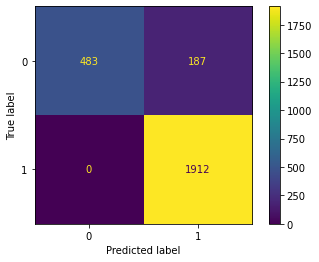

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()
plt.show()

In [41]:
from sklearn.metrics import classification_report

target_names = ['spam','ham']
print(classification_report(y_test, y_pred))#, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84       670
           1       0.91      1.00      0.95      1912

    accuracy                           0.93      2582
   macro avg       0.96      0.86      0.90      2582
weighted avg       0.93      0.93      0.92      2582



## Logistic Regression classifier.  

In [42]:
lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(tf_train, y_train)
y_pred_lr = lr.predict(tf_test)
print(classification_report(y_test, y_pred_lr))#, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       670
           1       0.97      1.00      0.99      1912

    accuracy                           0.98      2582
   macro avg       0.99      0.96      0.97      2582
weighted avg       0.98      0.98      0.98      2582



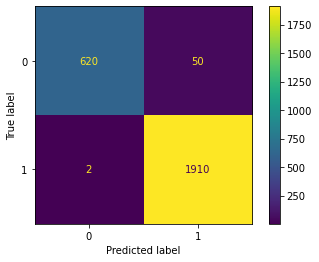

In [43]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

### Comment.  
**Note: Ham is 1, Spam is 0**  
- First, based on overall accuracy of > 90%, both naive bayes and logistic regression performed significantly better than a random guess because the dataset contains 65% ham emails. 

- What is the true cost of having a spam get to the inbox.  
- The company cannot tolerate spam at all. Therefore we want a model that can maximizes spam classification.
    - The fewer misclassified spam the better.
- The best model is logistic regression. It was able to recall the minority class (spam) 93% of the time.  
- The confusion matrix displays above, logistic regression model correctly classified 606 out of 670 spam emails.
    - Much better than naive bayes that correctly classified 452 of the 670 spam emails while allowing the remainder to spam workers inboxes.
    - These interpretations are also shown in the recall section of the classification report:
        - Logistic regression = 93%, better than Naive Bayes = 67%.  
        - The logistic regression recall was achieved without any significant trade off in precision which is really good.  


**More**

The F1 score which provides a balance between precision and recall shows 96% for the class of interest (i.e. spam) in logistic regression while it shows 81% for naive bayes. This further indicates that logistic regression is our best model. 

    


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display important features the model used to make decision.

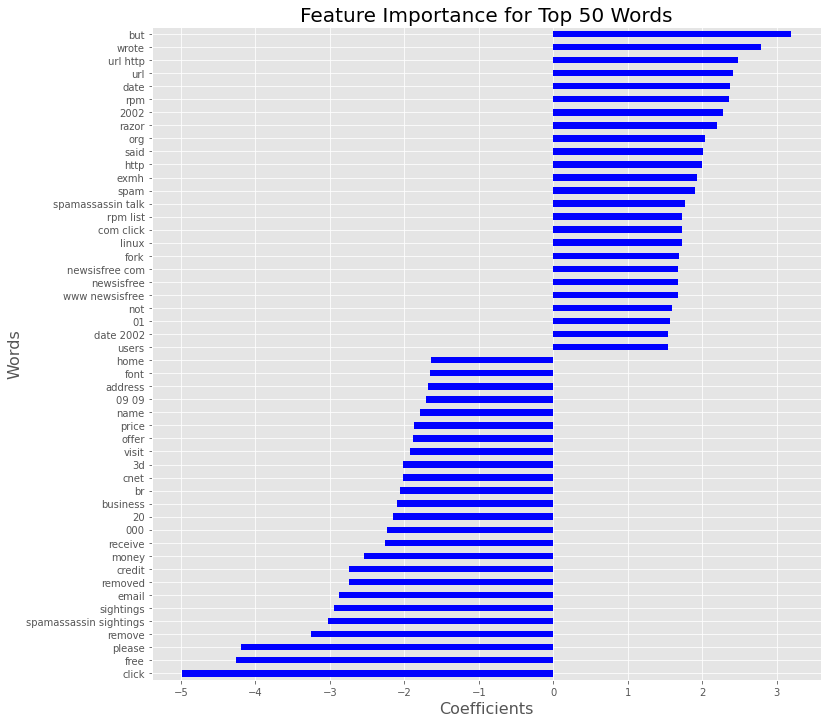

In [45]:
coeffs = lr.coef_.tolist()
column_names=tfidf.get_feature_names()

feature_weights_top = pd.Series(coeffs[0],index=column_names).sort_values(ascending=True).head(n =25)
feature_weights_bot = pd.Series(coeffs[0],index=column_names).sort_values(ascending=False).head(n = 25)

combined_feature_wts_high = [feature_weights_top, feature_weights_bot]
combined_feature_wts_high = pd.concat(combined_feature_wts_high).sort_values(ascending=True)

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
combined_feature_wts_high.plot(kind='barh', color='blue')

plt.ylabel("Words", fontsize=16)
plt.xlabel("Coefficients", fontsize=16)
plt.title('Feature Importance for Top 50 Words', fontsize=20)
plt.show()

### About the coefficients.  

'click', 'free', 'please', 'but', 'wrote' appear to be the the most influential words that determine whether an email gets classified as spam or ham.

# Clustering  

The objective of this clustering section is to cluster the email messages based on the tf-idf vectors fit to the messages.
- Note that clustering is an unsupervised technique applied to dataset that do not have labels.  
    - We have labels. 
- Note that kmeans will always converge to a different solution each time we run it.  
    - But we will do our best to segment the dataset into clusters as permitted by KMeans++. 
- We run silhouette score to select the optimal number of clusters we need for this dataset.  

In [46]:
from collections import Counter
from sklearn.cluster import KMeans
import pandas as pd

In [47]:
from sklearn.metrics import silhouette_score


Here is the source of the slihouette score snippet:

https://refactored.ai/microcourse/notebook?path=content%2F07-Unsupervised_Models%2F02-K-means_Clustering%2Fadvanced-k-means.ipynb

For n_clusters=2, Silhouette Coefficient = 0.006682081703063595
For n_clusters=3, Silhouette Coefficient = 0.009623302230370272
For n_clusters=4, Silhouette Coefficient = 0.012240481229193563
For n_clusters=5, Silhouette Coefficient = 0.01550524047072415
For n_clusters=6, Silhouette Coefficient = 0.016000981180409924
For n_clusters=7, Silhouette Coefficient = 0.01796009081161735
For n_clusters=8, Silhouette Coefficient = 0.019954253063698846
For n_clusters=9, Silhouette Coefficient = 0.023126378988234227
For n_clusters=10, Silhouette Coefficient = 0.024494230382312826


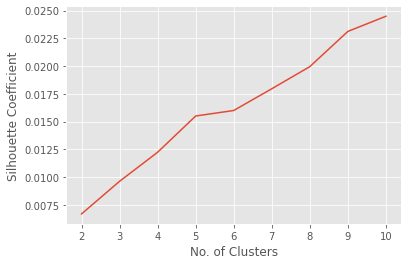

In [48]:
k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters = n_cluster).fit(tf_train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(tf_train, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)

plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

- Based on the plot of silhouette score and k we will select k=2 for the number of clusters.    
- Incidentally this agrees with the actual number of label for the emails (i.e. Spam or Ham).  

In [49]:
NUM_CLUSTERS = 2
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(tf_train)
Counter(km.labels_)

Counter({1: 5066, 0: 958})

In [50]:
df_train = pd.DataFrame({'email':train, 'target':y_train})


In [51]:
df_train['kmeans_cluster'] = km.labels_ #Add the labels to the train dataset

#Group the messages by their cluster numbers and sort them
email_clusters = (df_train[['email', 'kmeans_cluster', 'target']].sort_values(by=['kmeans_cluster', 'target'],
                                                                            ascending=False).groupby('kmeans_cluster').head(20))
email_clusters = email_clusters.copy(deep=True)

### Visualize the content of the clusters.  
- To ensure that the in-cluster assignments make contextual sense to us.
- Here we loop through the list of clusters.
    - Then we create a dataframe to store the key features in each cluster along with their respective messages

In [52]:
feature_names = tfidf.get_feature_names()
topn_features = 15 #top 15 features for each centroid
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [53]:
cluster_lbl = []
key_features_ = []
in_cluster_msgs = []
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    email_msgs = email_clusters[email_clusters['kmeans_cluster'] ==cluster_num]['email'].values.tolist()
    cluster_lbl.append(cluster_num+1)
    key_features_.append(key_features)
    in_cluster_msgs.append(email_msgs)
cluster_df = pd.DataFrame({'cluster_label':cluster_lbl, 'key_features':key_features_, 'in_cluster_msg':in_cluster_msgs})

    

Here is the dataframe to view what emails were grouped into respect clusters.

In [54]:
cluster_df

,cluster_label,key_features,in_cluster_msg
0,1,"[rpm, net, lists, rpm list, list, spamassassin...",[number 1 isp france third isp europe wanadoo ...
1,2,"[com, http, linux, http www, www, ie, not, lin...",[xander blakley quotes russian joke terrific b...


### Clustering fit-predict.  

In [55]:
model_km = KMeans(n_clusters = 2, tol=0.0001,max_iter=300)
cluster_lbl = model_km.fit(tf_train,y_train)


In [56]:
labels, lbl_counts = np.unique(cluster_lbl, return_counts=True)
labels, lbl_counts

(array([KMeans(n_clusters=2)], dtype=object), array([1], dtype=int64))

There are 4970 email messages in cluster 0 and 1054 messages in cluster 1 for this iteration.

## Affinity Propagation.  
Adapted from Text Analytics: Dipanjan 2019. Page 508.
- While I am well aware of using the Silhouette score to select the optimal number of clusters, 
    - in this case I prefer to use the Affinity Propagation as an alternative.
- Affinity propagation constructs clusters freely without suggesting number of clusters to it. 
    - It uses the structure in the dataset and creates clusters instances by iterativel 'passing messages' between pair of instances until convergence is achieved. 

In [57]:
from sklearn.cluster import AffinityPropagation

In [58]:
aff_prop = AffinityPropagation(max_iter=1500)
aff_prop.fit(tf_train)
cluster_count = Counter(aff_prop.labels_)
cluster_count.most_common(5)

[(-1, 6024)]

### Visualize 

- The affinity propagation segments the entire dataset into pseudo clusters that are analogous to the result of k-means. 
    - The segments/clusters can be numerous we just have to select the most important number of clusters we want.  
- Like we did for the k means, let us see the actual content of the clusters.  
    - Here we loop through the list of selected number of clusters/segment.  
        - Then we create a dataframe to store the key features in each cluster along with their respective messages.  

In [59]:
df_train['aff_prop_cluster'] = aff_prop.labels_
select_clusters = [item[0] for item in cluster_count.most_common(5)]
df_train_ap = df_train[df_train['aff_prop_cluster'].isin(select_clusters)]
email_clusters_ap = (df_train_ap[['email', 'aff_prop_cluster', 'target']].sort_values(by=['aff_prop_cluster', 'target'],
                                                                                      ascending=False).groupby('aff_prop_cluster').head(20))

In [60]:
email_clusters_ap = email_clusters_ap.copy(deep=True)

In [61]:
ap_cluster_lbl = []
in_cluster_msgs_ap = []

for cluster_num in range(len(select_clusters)):
    email_ = email_clusters_ap[email_clusters_ap['aff_prop_cluster'] == select_clusters[cluster_num]]['email'].values.tolist()
    ap_cluster_lbl.append(cluster_num+1)    
    in_cluster_msgs_ap.append(email_msgs)
ap_cluster_df = pd.DataFrame({'ap_cluster_label':ap_cluster_lbl, 'in_cluster_msg':in_cluster_msgs_ap})
ap_cluster_df


,ap_cluster_label,in_cluster_msg
0,1,[xander blakley quotes russian joke terrific b...


### Comment on Affinity Propagation.  
-I don't think the affinity propagation converged to a good solution for this dataset. 
- It only gave us one cluster.  
- So I reverted to using the Silhouette score.  